**Matplotlib tutorial here**
!(https://viblo.asia/p/gioi-thieu-ve-matplotlib-mot-thu-vien-rat-huu-ich-cua-python-dung-de-ve-do-thi-yMnKMN6gZ7P)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

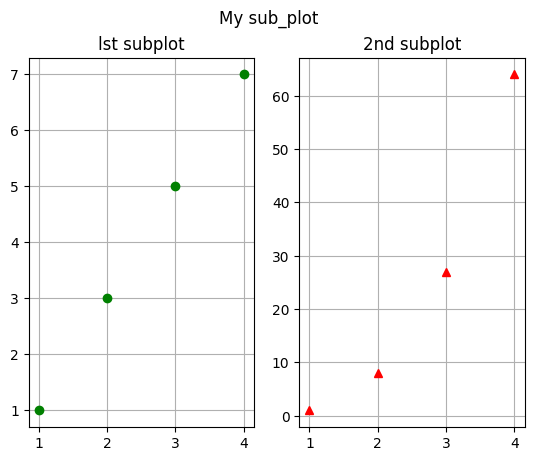

In [7]:
# subplot (nrows, ncols và index) so hang so cot va index cua subplot
plt.subplot(1,2,1) # 1 hang, 2 cot va index 1
plt.plot([1,2,3,4], [1,3,5,7], "go")
plt.title("lst subplot")
plt.grid()

plt.subplot(1,2,2) # tren khung hinh do nhuw ow index so 2
x = np.arange(1,5)
y = x**3
plt.plot(x,y,"r^")
plt.title("2nd subplot")
plt.suptitle("My sub_plot")
plt.grid()

plt.show()


Text(0.5, 1.0, 'row02col2')

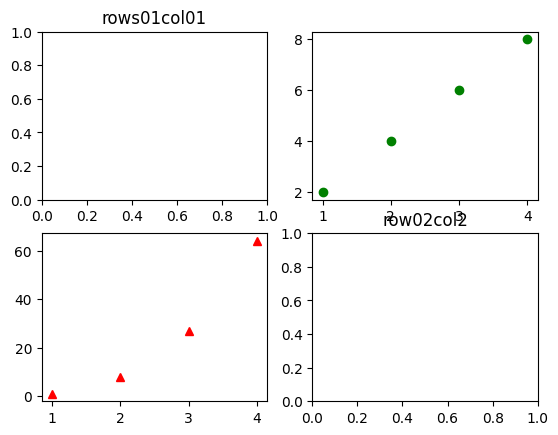

In [11]:
# neu muon tao ra nhieu suplot torng hinh
x = np.arange(1,5)
y = x**3

fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,1].plot([1,2,3,4], [2,4,6,8], "go")
ax[1,0].plot(x,y, "r^")
ax[0,0].set_title("rows01col01")
ax[1,1].set_title("row02col2")

## Bar plot bieu do thanh

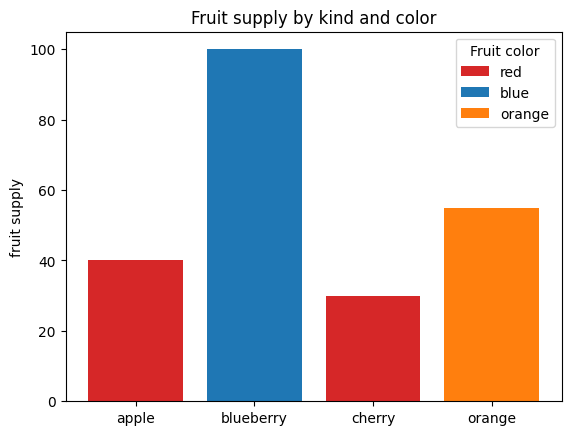

In [12]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

+ Để tạo các biểu đồ thanh xếp chồng theo chiều ngang, ta sử dụng phương thức bar() hai lần và chuyển các đối số trong đó ta đề cập đến index và width của biểu đồ thanh để xếp chúng theo chiều ngang. Ngoài ra, chú ý việc sử dụng hai phương thức legend() được sử dụng để hiển thị chú giải của biểu đồ và xticks() để gắn nhãn trục x dựa trên vị trí của các thanh.

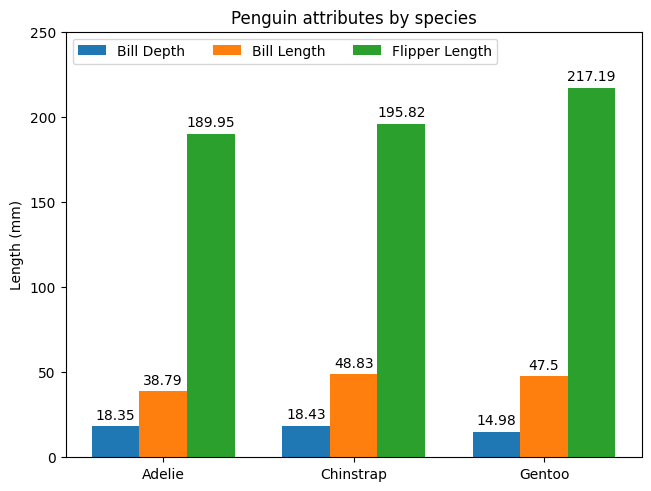

In [17]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

+ để xếp theo chiều dọc các biểu đồ thanh với nhau, chúng ta có thể sử dụng đối số bottom và đề cập đến biểu đồ thanh mà chúng ta muốn xếp chồng bên dưới làm giá trị của nó.

## Bieu do tron

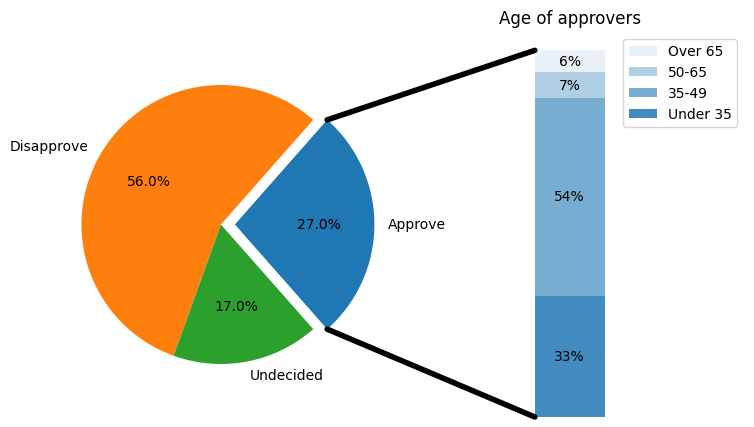

In [18]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

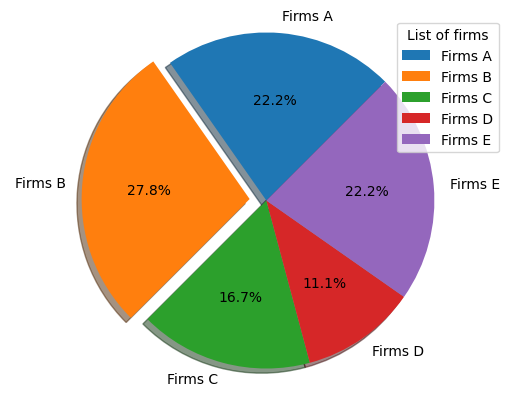

In [22]:
firms = ["Firms A", "Firms B", "Firms C", "Firms D", "Firms E"]
maker_share = [20,25,15,20,20]
Explode = [0, 0.1, 0, 0, 0]
plt.pie(maker_share, explode=Explode, labels=firms, shadow=True, startangle=45, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(title = "List of firms")
plt.show()